# Ejercicio 5

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, cos, sin, sinc, log10, unwrap, angle
from numpy.fft import fft, fftshift
from scipy.signal import remez, freqz, lfilter
from scipy.misc import electrocardiogram

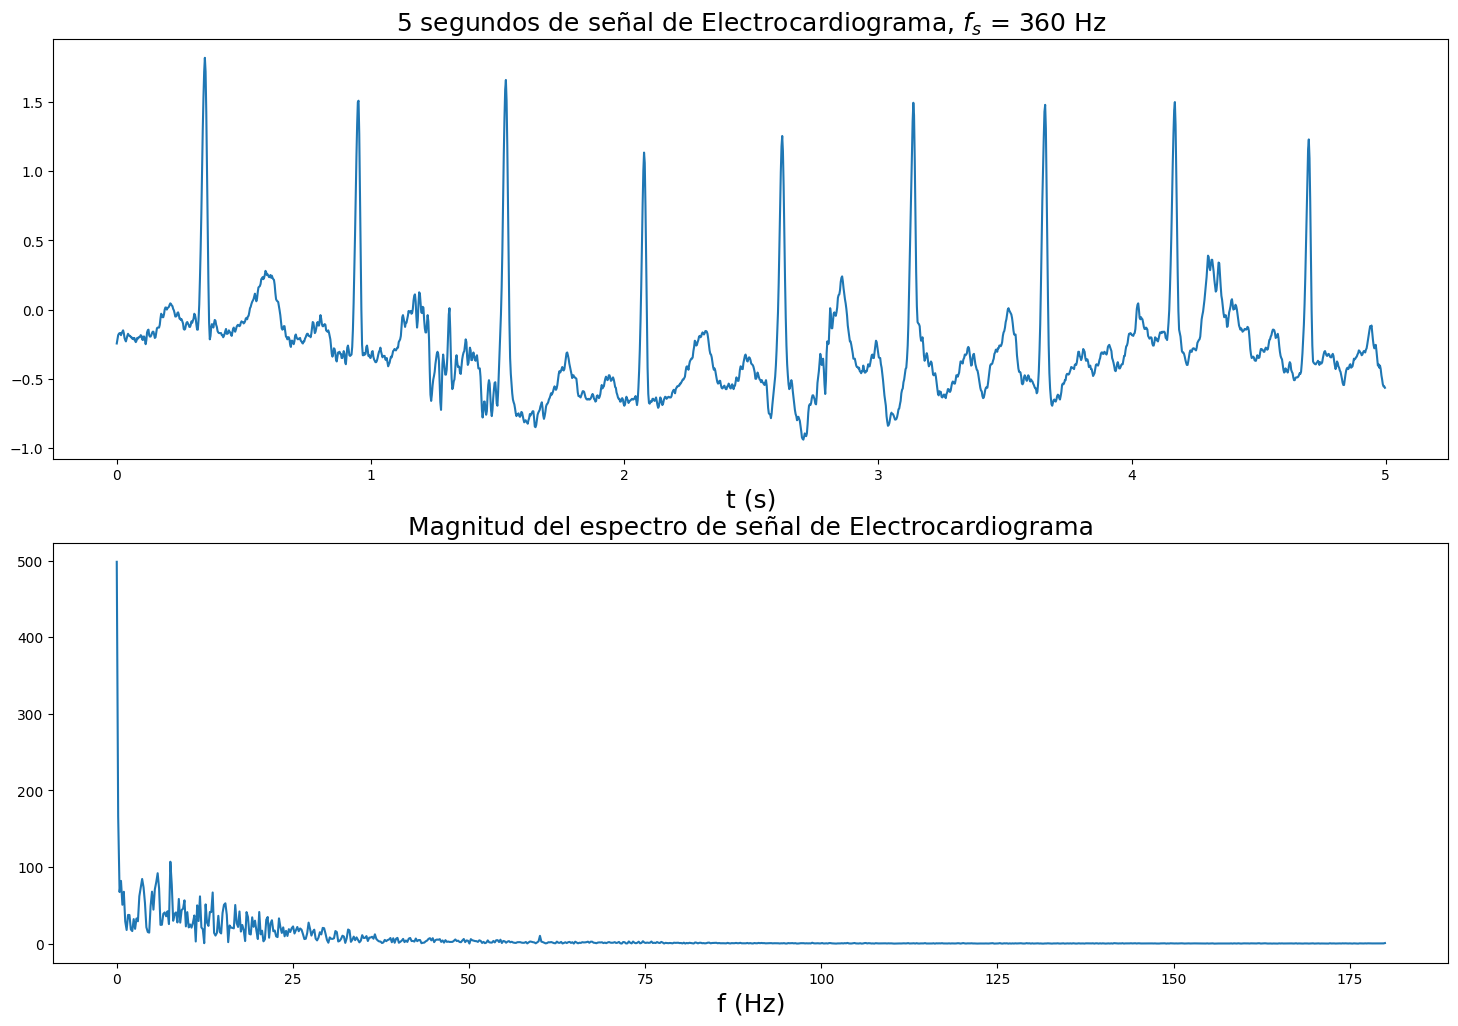

In [81]:
fs = 360
T = 5

ekg = electrocardiogram()[:T*fs]
N = len(ekg)
t = np.arange(N)/fs  

omega = np.linspace(0, fs/2, N//2)
EKG = fft(ekg, N)[:N//2]

fig, axs = plt.subplots(2,1, figsize=(18,12))

axs[0].plot(t,ekg)
axs[1].plot(omega, (abs(EKG)))

axs[0].set_title(f"{T} segundos de señal de Electrocardiograma, $f_s$ = {fs} Hz",fontsize=18)
axs[0].set_xlabel("t (s)", fontsize=18)

axs[1].set_title("Magnitud del espectro de señal de Electrocardiograma",fontsize=18)
axs[1].set_xlabel("f (Hz)", fontsize=18)
plt.show()

Text(0.5, 0, 'f (Hz)')

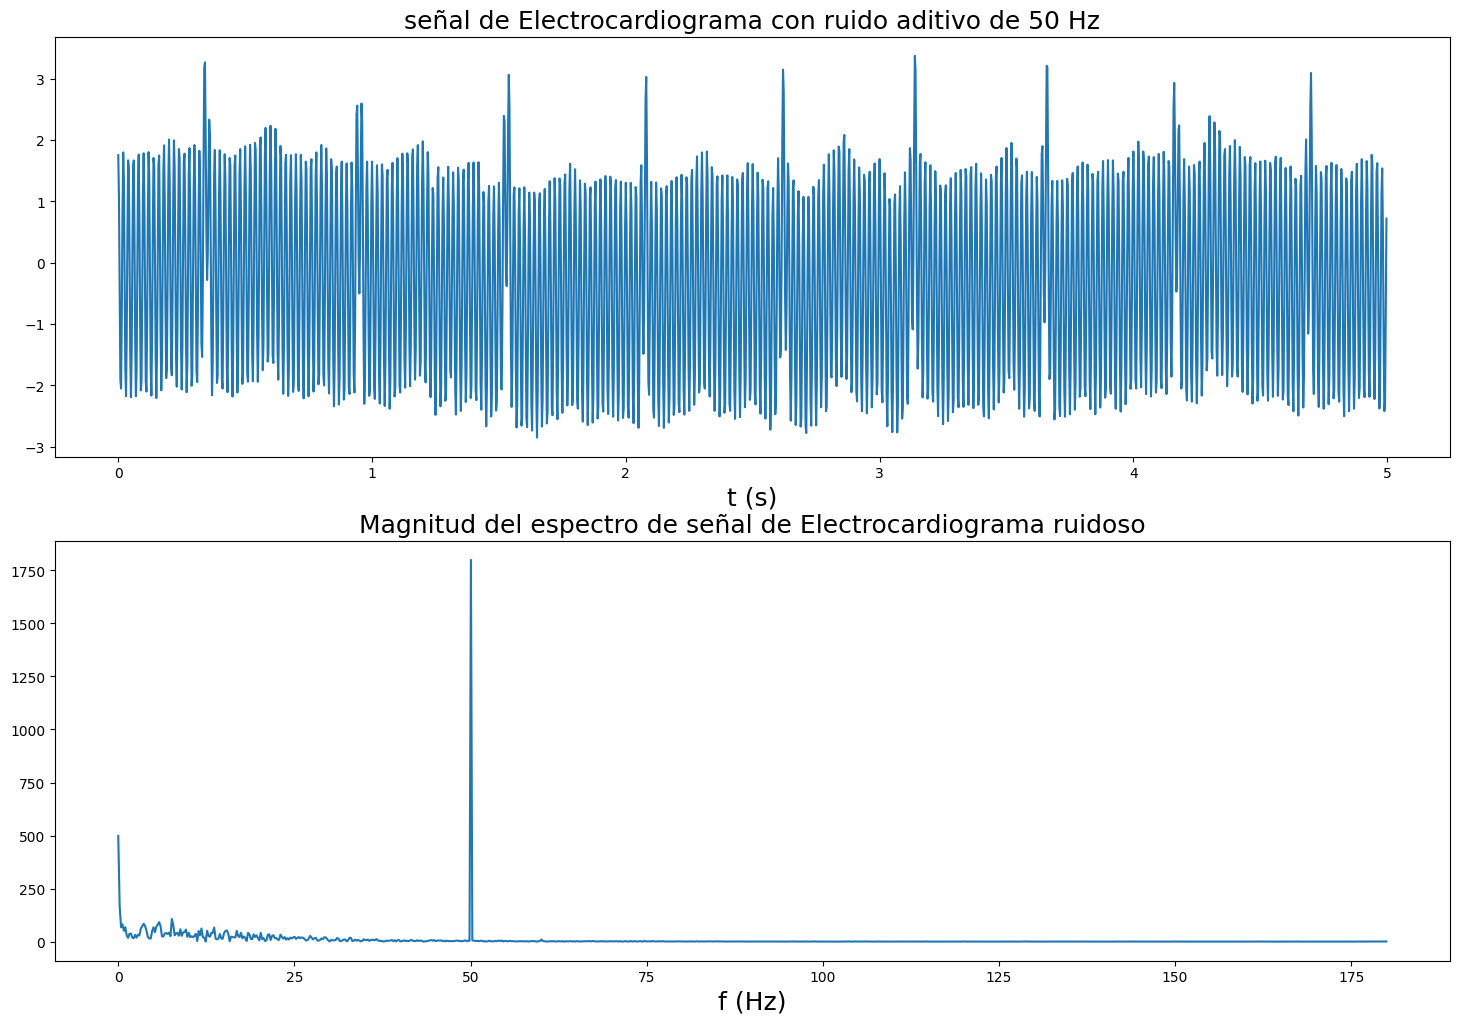

In [82]:
ekg_noisy = ekg + 2*cos(2*pi*(50/fs)*np.arange(len(ekg)))
EKG_noisy = fft(ekg_noisy, N)[:N//2]

fig, axs = plt.subplots(2,1, figsize=(18,12))
axs[0].plot(t,ekg_noisy)
axs[1].plot(omega, (abs(EKG_noisy)))

axs[0].set_title(f"señal de Electrocardiograma con ruido aditivo de 50 Hz",fontsize=18)
axs[0].set_xlabel("t (s)", fontsize=18)

axs[1].set_title("Magnitud del espectro de señal de Electrocardiograma ruidoso",fontsize=18)
axs[1].set_xlabel("f (Hz)", fontsize=18)

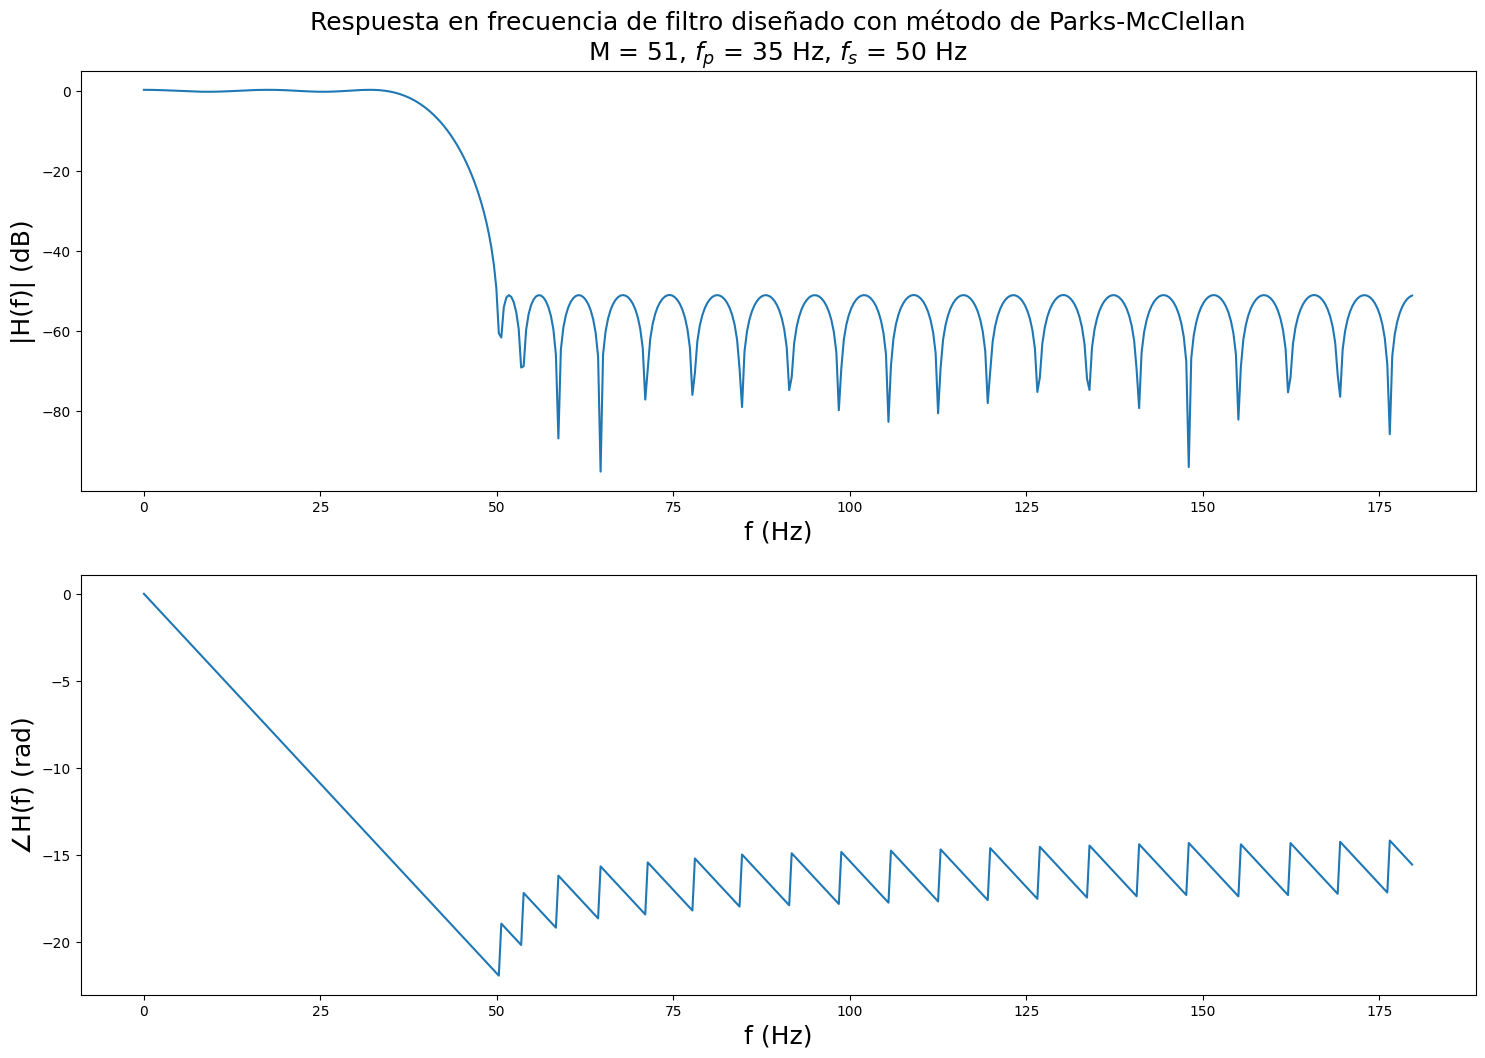

In [83]:
#M = 223
M = 51
#M = 13
f_p, f_s = 35, 50
h = remez(M, (0, f_p, f_s, fs/2), (1, 0), (1, 10), fs=fs)
w, H = freqz(h,1)

fig, axs = plt.subplots(2,1, figsize=(18,12))
axs[0].plot(w*(fs/(2*pi)), 20*log10(abs(H)))
axs[1].plot(w*(fs/(2*pi)), unwrap(angle(H)))

axs[0].set_title('Respuesta en frecuencia de filtro diseñado con método de Parks-McClellan\n' +
                 f'M = {M}, $f_p$ = {f_p} Hz, $f_s$ = {f_s} Hz', fontsize=18)
axs[0].set_xlabel('f (Hz)', fontsize=18)
axs[0].set_ylabel('|H(f)| (dB)', fontsize=18)

axs[1].set_xlabel('f (Hz)', fontsize=18)
axs[1].set_ylabel('$\\angle$H(f) (rad)', fontsize=18)
plt.show()

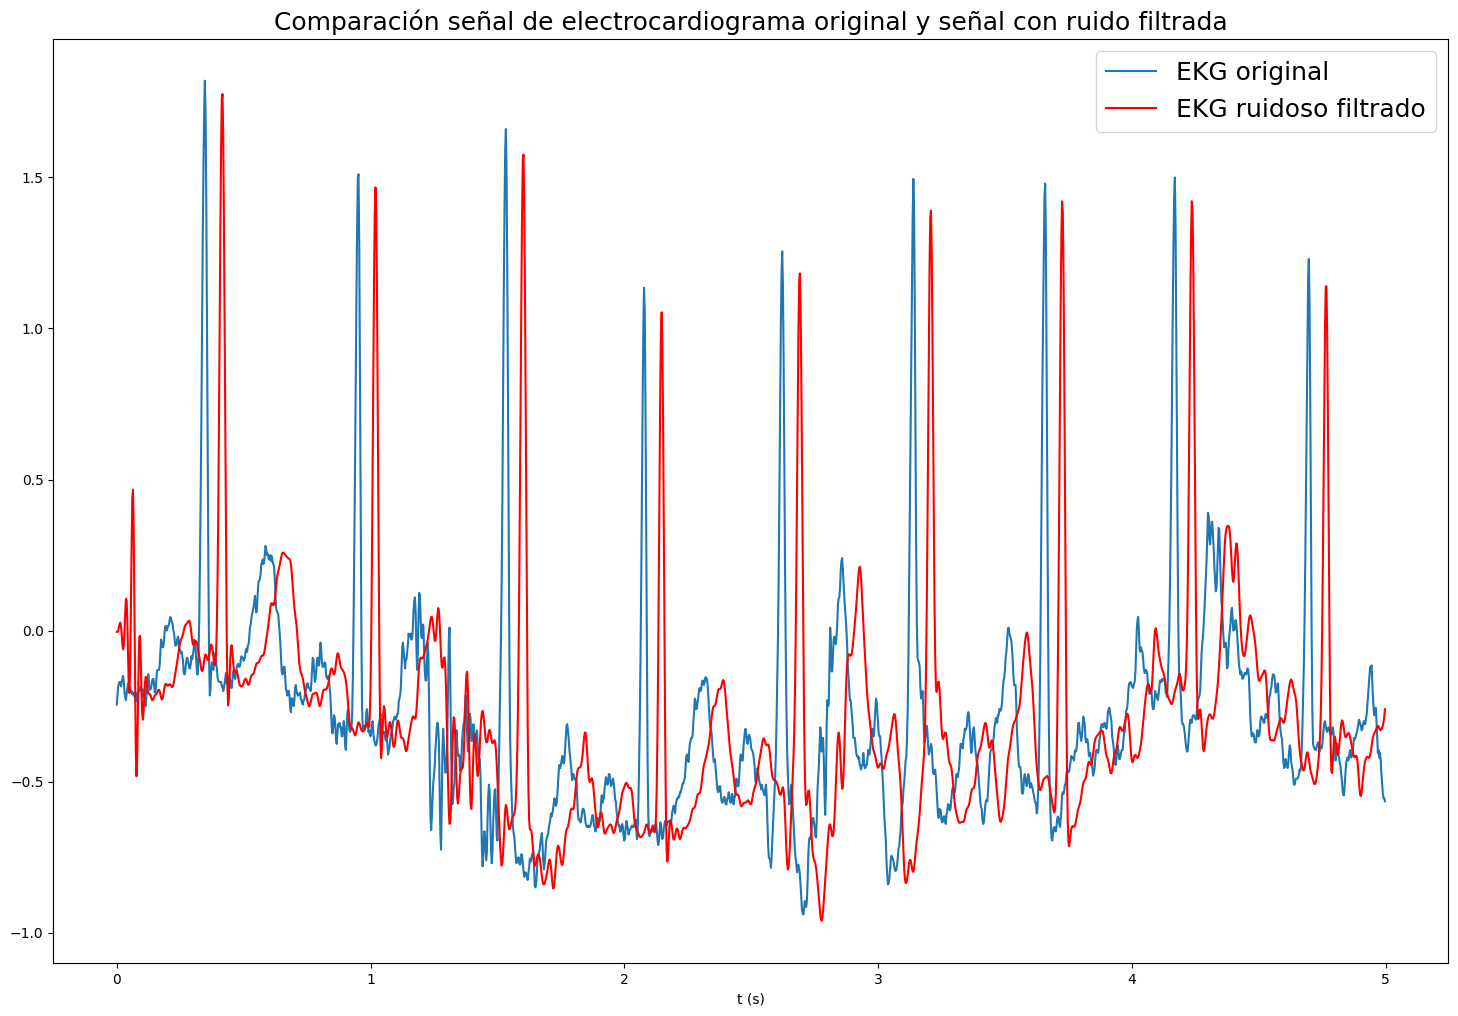

In [84]:
ekg_filt = lfilter(h,1, ekg_noisy)
fig, axs = plt.subplots(1,1, figsize=(18,12))
axs.plot(t,ekg)
axs.plot(t,ekg_filt, color = 'r')
axs.set_title("Comparación señal de electrocardiograma original y señal con ruido filtrada", fontsize=18)
axs.set_xlabel("t (s)")
axs.legend(["EKG original", "EKG ruidoso filtrado"], fontsize=18)
plt.show()